#### 다중분류를 위한 OvR(OvA)
 - 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

#

In [46]:
### 모듈로딩
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

- 데이터셋 load_digits
 * 내장 데이터셋
 * 이미지 데이터셋 => 8*8 크기 이미지
 * 이미지 라벨.타겟 => 숫자 0~9까지 즉, 총 10개 클래스

In [47]:
featureDF, targetSR = load_digits(as_frame=True,return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위
featureDF = featureDF/255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [48]:
featureDF.head(1), targetSR.head

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0        0.0        0.0   0.019608    0.05098   0.035294   0.003922   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0        0.0        0.0   0.023529    0.05098   0.039216        0.0   
 
    pixel_7_6  pixel_7_7  
 0        0.0        0.0  
 
 [1 rows x 64 columns],
 <bound method NDFrame.head of 0       0
 1       1
 2       2
 3       3
 4       4
        ..
 1792    9
 1793    0
 1794    8
 1795    9
 1796    8
 Name: target, Length: 1797, dtype: int32>)

(8, 8)


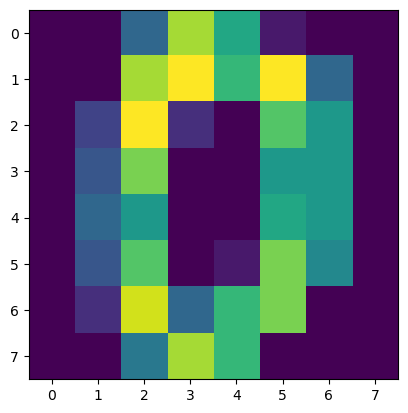

In [49]:
## 이미 데이터 시각화
import matplotlib.pyplot as plt

imgdata = featureDF.iloc[0].to_numpy().reshape(-1,8)
print(imgdata.shape)

plt.imshow(imgdata)
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [50]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,targetSR, stratify=targetSR, random_state=10)

In [51]:
featureDF.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.00000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.001192,0.020411,0.046415,0.046463,0.022674,0.005342,0.000508,0.000022,0.007819,...,0.014608,0.00081,0.000002,0.001096,0.021794,0.047408,0.046310,0.026526,0.008109,0.001429
std,0.0,0.003558,0.018646,0.016662,0.016813,0.022221,0.013042,0.004068,0.000369,0.012534,...,0.019292,0.00386,0.000093,0.003664,0.020012,0.017156,0.019349,0.023140,0.016041,0.007295
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.003922,0.039216,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.003922,0.043137,0.039216,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.015686,0.050980,0.050980,0.015686,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.00000,0.000000,0.000000,0.015686,0.050980,0.054902,0.023529,0.000000,0.000000
75%,0.0,0.000000,0.035294,0.058824,0.058824,0.043137,0.000000,0.000000,0.000000,0.011765,...,0.027451,0.00000,0.000000,0.000000,0.039216,0.062745,0.062745,0.047059,0.007843,0.000000
max,0.0,0.031373,0.062745,0.062745,0.062745,0.062745,0.062745,0.058824,0.007843,0.062745,...,0.062745,0.05098,0.003922,0.035294,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745


In [52]:
# 모듈로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [53]:
# 모델 파라미터
print(f'ovr_clf.estimators_ : {len(ovr_clf.estimators_)}')
print(f'ovr_clf.classes_ : {ovr_clf.classes_}')
print(f'ovr_clf.n_classes_ : {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_}')

ovr_clf.estimators_ : 10
ovr_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_ : 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [54]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx}]분류기', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[0]분류기 [[ 0.00000000e+00 -1.17211304e-01 -3.61976716e-01  6.37992922e-01
  -2.59516080e-01 -1.28004235e+00 -5.49554643e-01 -5.15394269e-02
  -2.48867098e-03 -4.50770969e-01  8.75529916e-01  6.75669778e-01
   7.61063082e-01  1.42181524e+00 -3.72707245e-01 -4.79082752e-02
  -8.76059290e-04  4.83967023e-01  1.73526178e+00 -5.66661564e-01
  -1.82795465e+00  2.02796255e+00  6.80700634e-01 -2.29999080e-02
  -2.33809952e-04  1.17166680e+00  1.43124099e+00 -2.77339186e+00
  -4.06945241e+00  6.21786489e-01  1.75117326e+00 -1.03944146e-03
   0.00000000e+00  1.44042261e+00  1.66074394e+00 -3.35466822e+00
  -4.16837941e+00 -1.82033356e-01  1.70005379e+00  0.00000000e+00
  -6.22709065e-03  7.53400694e-01  2.70397833e+00 -2.23501260e+00
  -2.41565152e+00  1.07409288e+00  9.19098746e-01 -1.27278179e-02
  -1.92354211e-03  2.32108843e-02  2.27842435e+00  3.91210660e-01
   5.69341433e-01  1.80144114e+00 -6.51051162e-01 -7.93462636e-02
  -3.44895266e-04 -1.12691963e-01 -5.45168374e-01  6.15148191e-01
   

In [86]:
print(f'확률값 : {ovr_clf.predict_proba(X_test.iloc[:5])}')
print(ovr_clf.predict(X_test)[:5])

확률값 : [[0.0787733  0.07785004 0.11759237 0.19225415 0.04654342 0.10645157
  0.08302338 0.06987207 0.09086352 0.13677619]
 [0.11828699 0.06343049 0.07983869 0.15454072 0.06514682 0.10996318
  0.05301651 0.08138243 0.09232361 0.18207057]
 [0.08495929 0.08861693 0.06808398 0.08225892 0.11548253 0.11978089
  0.05975883 0.18208459 0.09322917 0.10574487]
 [0.0918344  0.12082816 0.09048671 0.07607    0.09319821 0.10774621
  0.07351068 0.0998756  0.15659425 0.08985579]
 [0.0767191  0.08928901 0.06765447 0.04952569 0.18302774 0.12253555
  0.10407496 0.14374714 0.08563126 0.07779507]]
[3 9 7 8 4]


In [78]:
ovr_clf.decision_function(X_test.iloc[:1])

array([[-2.46014186, -2.47293224, -2.0164841 , -1.43658085, -3.02068395,
        -2.12855139, -2.40297413, -2.58965629, -2.30415988, -1.84340565]])

[3 9 7 8 4]
